# Importing and Installing Libraries

The libraries include:
- **Data handling**: pandas, numpy for data manipulation and analysis
- **Visualization**: matplotlib, for data exploration and results visualization  
- **Recommendation Model**: tensorlow recommenders for the recommendation model

https://www.tensorflow.org/recommenders/examples/quickstart

In [1]:
!pip install -q tensorflow-recommenders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_recommenders as tfrs

# Data Exploration

Dataset source: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

This dataset is 3 years old and contains 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon

in this step we also check for:

1. **Data quality**: Identifying and handling missing values, duplicates, and inconsistencies
2. **Feature analysis**: Understanding what information is available about users, products, and their interactions
3. **Viewing Unique items**

In [3]:
!curl -L -o amazon-sales-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/karkavelrajaj/amazon-sales-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1995k  100 1995k    0     0  5432k      0 --:--:-- --:--:-- --:--:-- 5432k


In [4]:
!unzip amazon-sales-dataset.zip

Archive:  amazon-sales-dataset.zip
replace amazon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amazon.csv              


In [5]:
# Load the csv into a dataframe
df = pd.read_csv('amazon.csv')

In [6]:
# View the first 4 data
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Features on the datasets

* product_id - Product ID
* product_name - Name of the Product
* category - Category of the Product
* discounted_price - Discounted Price of the Product
* actual_price - Actual Price of the Product
* discount_percentage - Percentage of Discount for the Product
* discount_percentage - Percentage of Discount for the Product
* discount_percentage - Percentage of Discount for the Product
* discount_percentage - Percentage of Discount for the Product
* discount_percentage - Percentage of Discount for the Product
*  rating - Rating of the Product
* rating_count - Number of people who voted for the Amazon rating
* about_product - Description about the Product
*  user_id - ID of the user who wrote review for the Product
* user_name - Name of the user who wrote review for the Product
* review_id - ID of the user review
* review_title - Short review
* review_content - Long review
* img_link - Image Link of the Product
* product_link - Official Website Link of the Product


In [7]:
# Checking for null values
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


After checking for null values we found that there are 2 null values, we first check the location of the null values and deleted it

We then check for duplicate values

In [8]:
# Finding the null values
df[df.isnull().any(axis=1)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [9]:
# Dropping null values
df.dropna(inplace=True)

In [10]:
# Checking for null values
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [11]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
print(f"Unique Product ID: {len(df.product_id.unique())}")
print(f"Unique Product Name: {len(df.product_name.unique())}")
print(f"Unique Category: {len(df.category.unique())}")
print(f"Unique Rating: {len(df.rating.unique())}")

Unique Product ID: 1349
Unique Product Name: 1335
Unique Category: 211
Unique Rating: 28


In [13]:
print(f"Unique Product ID: {df.product_id.unique()}")
print("")
print(f"Unique Product Name: {df.product_name.unique()}")
print("")
print(f"Unique Rating: {df.rating.unique()}")

Unique Product ID: ['B07JW9H4J1' 'B098NS6PVG' 'B096MSW6CT' ... 'B009P2LIL4' 'B00J5DYCCA'
 'B01486F4G6']

Unique Product Name: ['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)'
 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices'
 ...
 'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)'
 'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)'
 'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)']

Unique Rating: ['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2

After viewing this we found a "|" in the rating

In [14]:
# Finding the "|"
df[df['rating'] == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


After reading the review_title and review_content for this review, let's assume that this user gave the ratings of 4

In [15]:
# Replacing the "|" with a 4 star rating
df = df.replace('|', '4')
df[df['product_id'] == 'B08L12N5H1']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,4,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

# Data Cleaning

1. **Converting ratings to numeric format**: Ensuring all ratings are in proper numerical format for modeling
2. **Building an interaction matrix**: Creating the user-item interaction dataset that forms the core of our recommendation system
3. **Converting to Tensorflow Format**: Transforming our pandas DataFrame into a specialized TensorFlow dataset format optimized for model training
4. **Data Shuffling and Splitting**: Randomizing and dividing the data into training and testing sets
5. **Creating Vocabulary Lists**:Generating unique identifiers for users and products that will be used in our embedding layers

In [17]:
# Convert ratings to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Create interaction dataset
interactions = df[['user_id', 'product_id', 'rating']]
interactions.head()

,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


In [19]:
# Create interactions dataframe
interactions = df[['user_id', 'product_id', 'rating']]

# Convert to TensorFlow dataset - make sure IDs are strings
ratings_tf = tf.data.Dataset.from_tensor_slices({
    "user_id": tf.cast(interactions["user_id"].values, tf.string),
    "product_id": tf.cast(interactions["product_id"].values, tf.string),
    "rating": interactions["rating"].values.astype(np.float32),
})

# Shuffle the data
tf.random.set_seed(42)
shuffled = ratings_tf.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

# Split into train and test
train = shuffled.take(int(len(interactions) * 0.8))
test = shuffled.skip(int(len(interactions) * 0.8)).take(int(len(interactions) * 0.2))

# Get unique user and product IDs as strings
unique_user_ids = np.unique(interactions["user_id"].values).astype(str).tolist()
unique_product_ids = np.unique(interactions["product_id"].values).astype(str).tolist()

print(f"Number of unique users: {len(unique_user_ids)}")
print(f"Number of unique products: {len(unique_product_ids)}")

Number of unique users: 1192
Number of unique products: 1349


# Model Development and Training

The recommendation system uses **model-based collaborative filtering** with neural networks. This approach learns patterns from user-item interactions (ratings) without requiring content information about the products themselves.


Model Architecture:

1. **Embedding Layers**:
   - Convert sparse user and product IDs into dense vector representations
   - Similar users or products will have similar embedding vectors
   - The embedding dimension (32) determines how much information we capture about each user/product

2. **Neural Network Layers**:
   - Three dense layers (256 → 128 → 1 neurons) that learn complex patterns
   - ReLU activation functions to introduce non-linearity
   - Final output is a single number representing the predicted rating

3. **Loss Function**:
   - Mean Squared Error (MSE) measures the difference between predicted and actual ratings
   - Root Mean Squared Error (RMSE) provides an interpretable metric for model evaluation

- The **call** method processes input features by extracting user and product IDs, looking up their embeddings, concatenating them, and passing through the neural network
- The **compute_loss** method calculates the difference between predicted and actual ratings
- Special care is taken not to modify input dictionaries during processing, ensuring TensorFlow optimization

In [20]:
# Define the model
class ProductRatingModel(tfrs.Model):
    def __init__(self, user_vocab, product_vocab, embedding_dim=32):
        super().__init__()

        # User and item embeddings
        self.user_embeddings = tf.keras.Sequential([
            tf.keras.layers.StringLookup(vocabulary=user_vocab, mask_token=None),
            tf.keras.layers.Embedding(len(user_vocab) + 1, embedding_dim)
        ])

        self.product_embeddings = tf.keras.Sequential([
            tf.keras.layers.StringLookup(vocabulary=product_vocab, mask_token=None),
            tf.keras.layers.Embedding(len(product_vocab) + 1, embedding_dim)
        ])

        # Rating prediction model
        self.rating_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1)
        ])

        # Task
        self.task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

    def call(self, features):
        # Convert IDs to strings - make sure they're already strings
        user_id = features["user_id"]
        product_id = features["product_id"]

        user_embedding = self.user_embeddings(user_id)
        product_embedding = self.product_embeddings(product_id)

        # Concatenate embeddings
        x = tf.concat([user_embedding, product_embedding], axis=1)

        return self.rating_model(x)

    def compute_loss(self, features, training=False):
        # Don't modify the original features dictionary
        ratings = features["rating"]
        # Create predictions using features without modifying them
        ratings_predictions = self(features)

        return self.task(labels=ratings, predictions=ratings_predictions)

# Model Training

The model is compiled using the Adam optimizer with a learning rate of 0.001, which provides adaptive learning rates for each parameter to ensure efficient convergence. We prepare the training and testing data by batching them into chunks of 512 examples and caching them for improved training speed and memory efficiency.

During training, the model runs for 10 epochs, with each epoch processing the entire training dataset once. As training progresses, the model gradually learns to predict user ratings more accurately by adjusting its internal parameters to minimize the mean squared error between predicted and actual ratings.

After training, we evaluate the model's performance on the held-out test set, calculating the Root Mean Squared Error (RMSE) which tells us how close our predictions are to the actual ratings on average. The visualization of RMSE over training epochs helps us understand the model's learning progression, with a decreasing RMSE indicating improving prediction accuracy. This graph also helps identify potential overfitting issues if the error starts increasing after initially decreasing.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'product_rating_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 16.5097 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 4.0936 - total_loss: 16.5097
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.7386 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.9999 - total_loss: 15.7386
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.8613 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.8941 - total_loss: 14.8613
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7886 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.7615 - total_loss: 13.7886 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.4511 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.5891 - total_loss: 12.4511
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7892 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.3615 - total_loss: 10.7892
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7664 - regularization_l

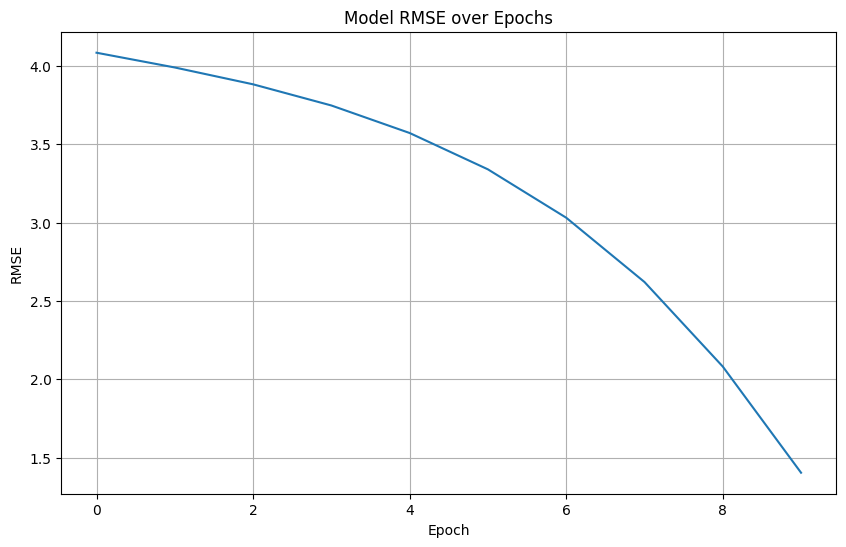

In [21]:
# Create and compile the model
model = ProductRatingModel(unique_user_ids, unique_product_ids)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Prepare cached and batched datasets
cached_train = train.batch(512).cache()
cached_test = test.batch(512).cache()

# Train the model
history = model.fit(cached_train, epochs=10)

# Evaluate the model
eval_results = model.evaluate(cached_test, return_dict=True)
print(f"Test RMSE: {eval_results['root_mean_squared_error']:.4f}")

# Visualize training metrics
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model RMSE over Epochs')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

# Generating Personalized Recommendations

Test the model by generating product recommendations:

1. **The Recommendation Process**:
   - Select a target user
   - Pair the user with all available products
   - Predict how the user would rate each product
   - Rank products by predicted rating
   - Return the top N highest-rated products

2. **Implementation Steps**:
   - Create a dataset with the user ID paired with all product IDs
   - Use the trained model to predict ratings
   - Convert predictions to a DataFrame and merge with product information
   - Sort by predicted ratings and select the top results

This function allows us to provide personalized recommendations for any user in our system.

In [22]:
# Function to get recommendations for a user
def get_recommendations_for_user(user_id, top_n=10):
    # Get all products
    all_products = df['product_id'].unique()

    # Create a dataset with user_id and all products
    user_product_pairs = tf.data.Dataset.from_tensor_slices({
        "user_id": tf.constant([str(user_id)] * len(all_products)),
        "product_id": tf.cast(all_products, tf.string)
    }).batch(128)

    # Predict ratings
    predictions = model.predict(user_product_pairs)

    # Create a dataframe with products and predicted ratings
    recommendations = pd.DataFrame({
        'product_id': all_products,
        'predicted_rating': predictions.flatten()
    })

    # Merge with product information
    product_info = df[['product_id', 'product_name', 'category']].drop_duplicates()
    recommendations = recommendations.merge(product_info, on='product_id')

    # Sort by predicted rating and return top n
    return recommendations.sort_values('predicted_rating', ascending=False).head(top_n)

sample_user = df['user_id'].iloc[0]
print(f"Getting recommendations for user: {sample_user}")
user_recommendations = get_recommendations_for_user(sample_user)
display(user_recommendations)

Getting recommendations for user: AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,product_id,predicted_rating,product_name,category
3,B08HDJ86NZ,6.125223,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...
527,B08BCKN299,5.949564,Sounce Gold Plated 3.5 mm Headphone Splitter f...,"Electronics|Headphones,Earbuds&Accessories|Ada..."
69,B01GGKYKQM,5.933814,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,Computers&Accessories|Accessories&Peripherals|...
326,B08V9C4B1J,5.910332,Synqe Type C to Type C Short Fast Charging 60W...,Computers&Accessories|Accessories&Peripherals|...
20,B09C6HXFC1,5.905346,Duracell USB Lightning Apple Certified (Mfi) B...,Computers&Accessories|Accessories&Peripherals|...
453,B092JHPL72,5.904705,"SWAPKART Flexible Mobile Tabletop Stand, Metal...",Electronics|Mobiles&Accessories|MobileAccessor...
358,B09YV4RG4D,5.902551,Fire-Boltt Ninja 3 Smartwatch Full Touch 1.69 ...,Electronics|WearableTechnology|SmartWatches
940,B008QTK47Q,5.883483,Philips GC1905 1440-Watt Steam Iron with Spray...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle..."
237,B0B5F3YZY4,5.878915,Wayona 3in1 Nylon Braided 66W USB Fast Chargin...,Computers&Accessories|Accessories&Peripherals|...
1231,B09M3F4HGB,5.878023,Borosil Volcano 13 Fin Oil Filled Radiator Roo...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe..."
